In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('winequality-white.csv', sep=';')
data = data.drop('quality', axis=1)

In [4]:
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

In [5]:
print("Estatísticas descritivas para o conjunto de dados original:")
print(data.describe())

print("\nEstatísticas descritivas para o conjunto de treinamento:")
print(train_data.describe())

print("\nEstatísticas descritivas para o conjunto de teste:")
print(test_data.describe())

Estatísticas descritivas para o conjunto de dados original:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     

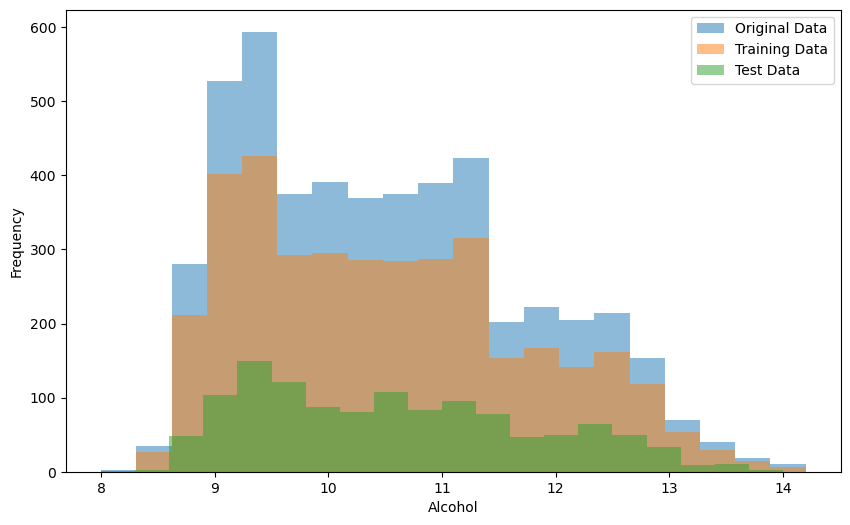

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data['alcohol'], bins=20, alpha=0.5, label='Original Data')
plt.hist(train_data['alcohol'], bins=20, alpha=0.5, label='Training Data')
plt.hist(test_data['alcohol'], bins=20, alpha=0.5, label='Test Data')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [11]:
from sklearn.model_selection import KFold

# Dividir o conjunto de treinamento em 5 folds e, em seguida, 10 folds
kf_5_folds = KFold(n_splits=5, shuffle=True, random_state=42)
folds_5 = list(kf_5_folds.split(train_data_scaled))

kf_10_folds = KFold(n_splits=10, shuffle=True, random_state=42)
folds_10 = list(kf_10_folds.split(train_data_scaled))

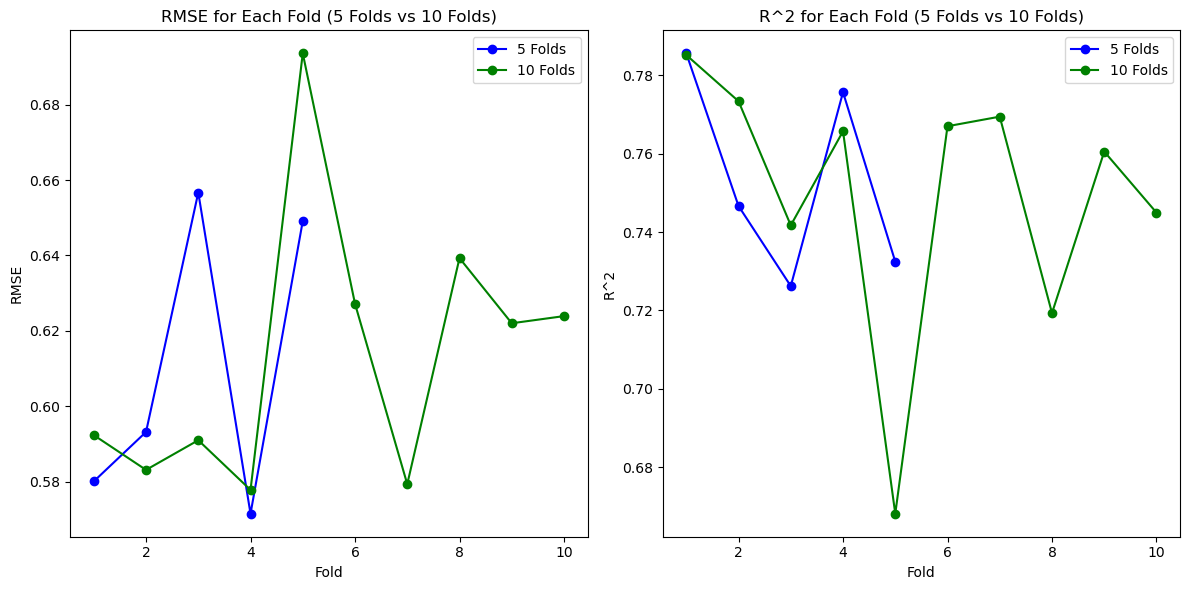

In [15]:
# Listas para armazenar as métricas de RMSE e R^2 para 5 folds e 10 folds
train_rmse_scores_5 = []
train_r2_scores_5 = []
test_rmse_scores_5 = []
test_r2_scores_5 = []

train_rmse_scores_10 = []
train_r2_scores_10 = []
test_rmse_scores_10 = []
test_r2_scores_10 = []

# Realizar regressão PCR e calcular métricas para 5 folds
for fold, (train_idx, val_idx) in enumerate(folds_5, 1):
    X_train_fold = train_data_scaled[train_idx]
    y_train_fold = train_data['alcohol'].values[train_idx]
    
    X_val_fold = train_data_scaled[val_idx]
    y_val_fold = train_data['alcohol'].values[val_idx]
    
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train_fold)
    X_val_pca = pca.transform(X_val_fold)
    
    model = LinearRegression()
    model.fit(X_train_pca, y_train_fold)
    
    train_predictions = model.predict(X_train_pca)
    val_predictions = model.predict(X_val_pca)
    
    train_rmse = mean_squared_error(y_train_fold, train_predictions, squared=False)
    train_r2 = r2_score(y_train_fold, train_predictions)
    test_rmse = mean_squared_error(y_val_fold, val_predictions, squared=False)
    test_r2 = r2_score(y_val_fold, val_predictions)
    
    train_rmse_scores_5.append(train_rmse)
    train_r2_scores_5.append(train_r2)
    test_rmse_scores_5.append(test_rmse)
    test_r2_scores_5.append(test_r2)

# Realizar regressão PCR e calcular métricas para 10 folds
for fold, (train_idx, val_idx) in enumerate(folds_10, 1):
    X_train_fold = train_data_scaled[train_idx]
    y_train_fold = train_data['alcohol'].values[train_idx]
    
    X_val_fold = train_data_scaled[val_idx]
    y_val_fold = train_data['alcohol'].values[val_idx]
    
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train_fold)
    X_val_pca = pca.transform(X_val_fold)
    
    model = LinearRegression()
    model.fit(X_train_pca, y_train_fold)
    
    train_predictions = model.predict(X_train_pca)
    val_predictions = model.predict(X_val_pca)
    
    train_rmse = mean_squared_error(y_train_fold, train_predictions, squared=False)
    train_r2 = r2_score(y_train_fold, train_predictions)
    test_rmse = mean_squared_error(y_val_fold, val_predictions, squared=False)
    test_r2 = r2_score(y_val_fold, val_predictions)
    
    train_rmse_scores_10.append(train_rmse)
    train_r2_scores_10.append(train_r2)
    test_rmse_scores_10.append(test_rmse)
    test_r2_scores_10.append(test_r2)

# Plotar gráficos de RMSE e R^2 para 5 folds e 10 folds
plt.figure(figsize=(12, 6))

# Gráfico de RMSE para 5 folds e 10 folds
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, 6), test_rmse_scores_5, marker='o', label='5 Folds', color='b')
plt.plot(np.arange(1, 11), test_rmse_scores_10, marker='o', label='10 Folds', color='g')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE for Each Fold (5 Folds vs 10 Folds)')
plt.legend()

# Gráfico de R^2 para 5 folds e 10 folds
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 6), test_r2_scores_5, marker='o', label='5 Folds', color='b')
plt.plot(np.arange(1, 11), test_r2_scores_10, marker='o', label='10 Folds', color='g')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.title('R^2 for Each Fold (5 Folds vs 10 Folds)')
plt.legend()

plt.tight_layout()
plt.show()

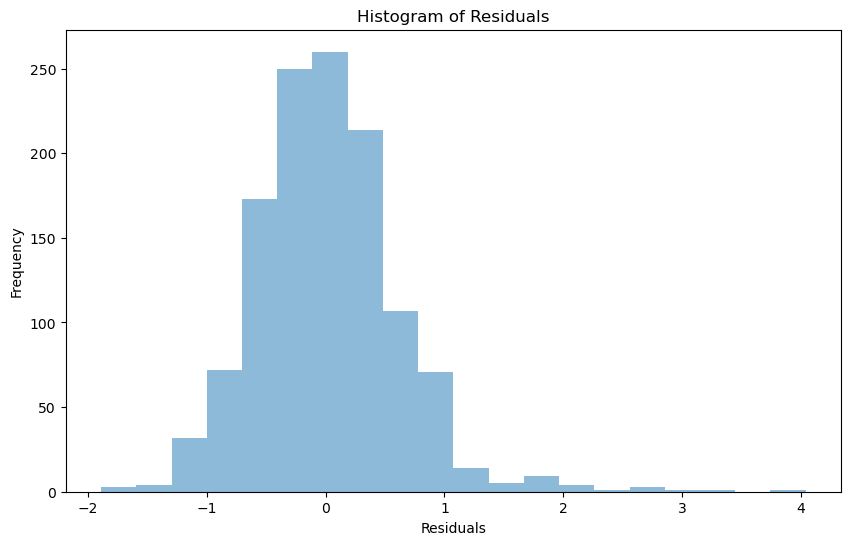

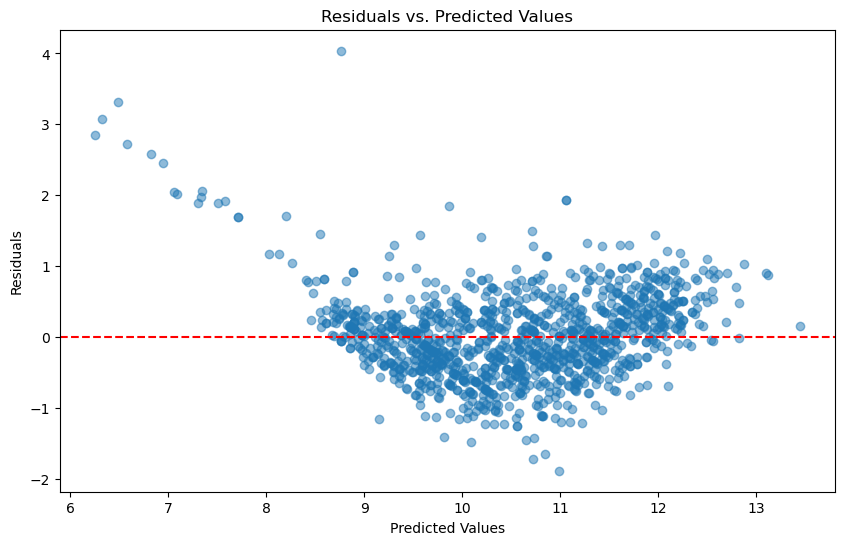

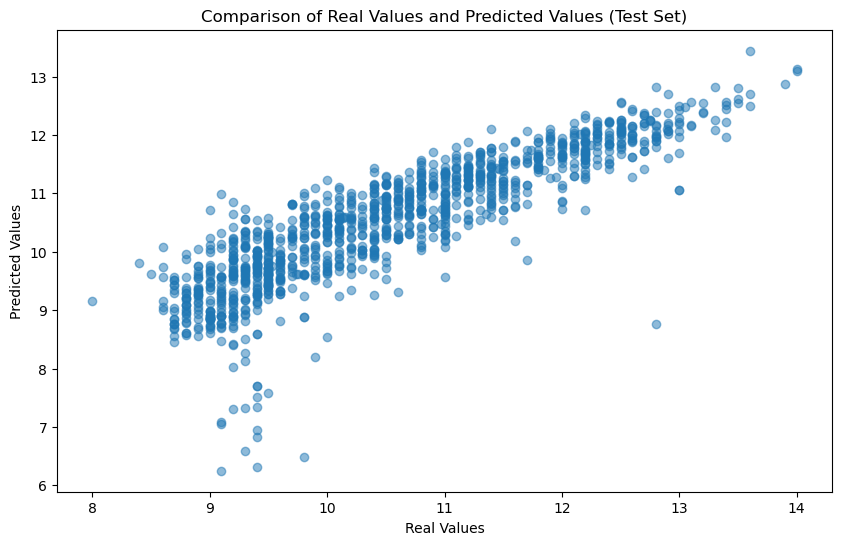

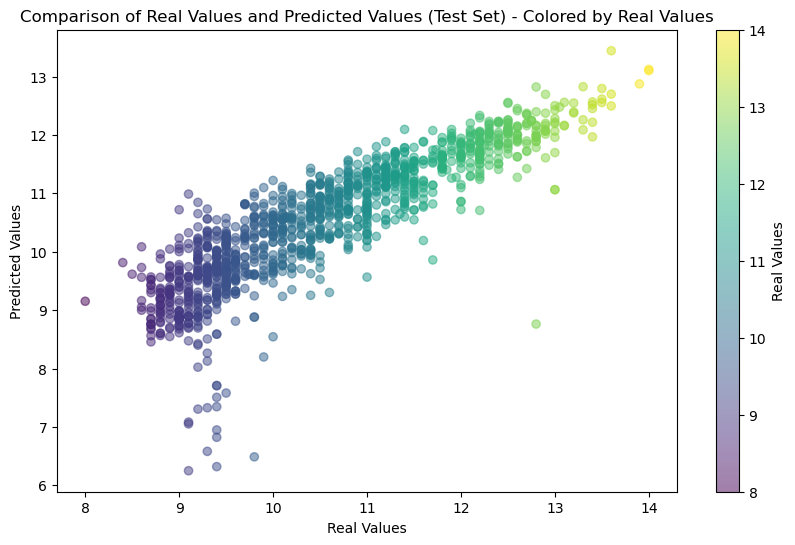

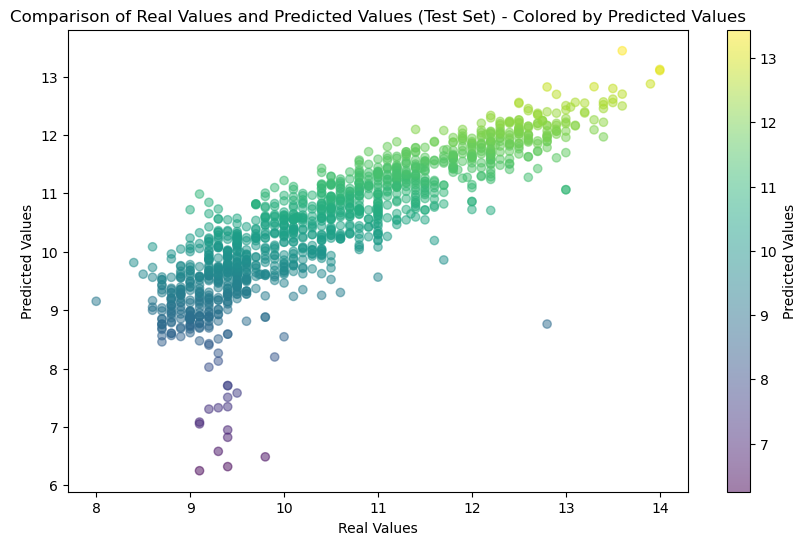

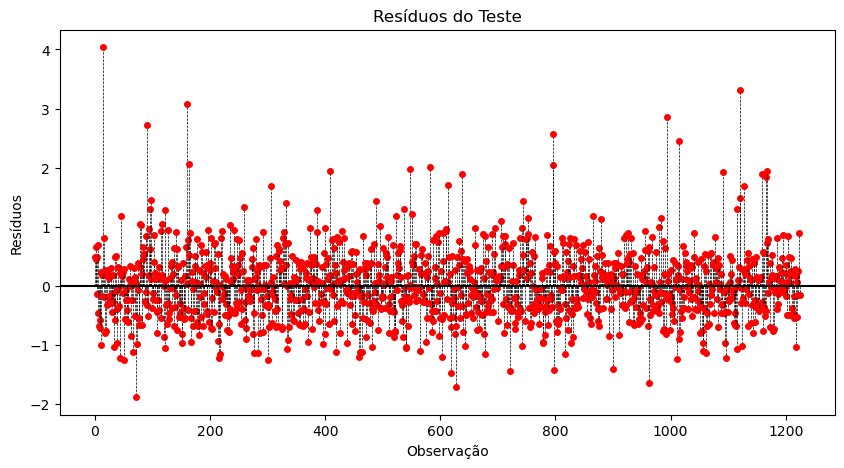

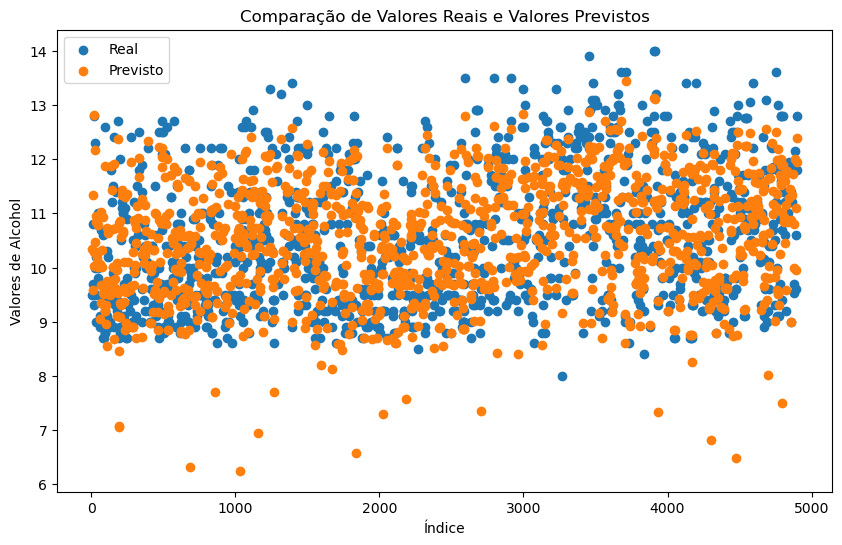

RMSE médio para 5 folds: 0.6101
R^2 médio para 5 folds: 0.7533
RMSE médio para 10 folds: 0.6130
R^2 médio para 10 folds: 0.7495


In [20]:
# Realizar regressão PCR com o conjunto de teste
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(train_data_scaled)
X_test_pca = pca.transform(test_data_scaled)

model = LinearRegression()
model.fit(X_train_pca, train_data['alcohol'].values)

test_predictions = model.predict(X_test_pca)

# Gráfico de Histograma dos Resíduos
residuals = test_data['alcohol'] - test_predictions
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Gráfico de Resíduos vs. Valores Previstos
plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Gráfico de Comparação de Valores Reais e Valores Previstos (Conjunto de Teste)
plt.figure(figsize=(10, 6))
plt.scatter(test_data['alcohol'], test_predictions, alpha=0.5)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real Values and Predicted Values (Test Set)')
plt.show()

# Gráfico de Comparação de Valores Reais e Valores Previstos (Conjunto de Teste) - Dispersão Colorida pelos Valores Reais
plt.figure(figsize=(10, 6))
plt.scatter(test_data['alcohol'], test_predictions, c=test_data['alcohol'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Real Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real Values and Predicted Values (Test Set) - Colored by Real Values')
plt.show()

# Gráfico de Comparação de Valores Reais e Valores Previstos (Conjunto de Teste) - Dispersão Colorida pelos Valores Previstos
plt.figure(figsize=(10, 6))
plt.scatter(test_data['alcohol'], test_predictions, c=test_predictions, cmap='viridis', alpha=0.5)
plt.colorbar(label='Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real Values and Predicted Values (Test Set) - Colored by Predicted Values')
plt.show()

# Gráfico adicional de Resíduos
fig, ax = plt.subplots(figsize=(10, 5))
for i, residual in enumerate(residuals):
    ax.plot([i, i], [0, residual], color='black', linestyle='--', linewidth=0.5)
    ax.plot(i, residual, marker='o', markersize=4, color='red')
ax.axhline(y=0, color='black', linestyle='-')
ax.set_xlabel('Observação')
ax.set_ylabel('Resíduos')
ax.set_title('Resíduos do Teste')
plt.show()

# Gráfico adicional de Comparação de Valores Reais e Valores Previstos
y_test = test_data['alcohol']
y_pred = test_predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Real')
plt.scatter(y_test.index, y_pred, label='Previsto')
plt.legend()
plt.title('Comparação de Valores Reais e Valores Previstos')
plt.xlabel('Índice')
plt.ylabel('Valores de Alcohol')
plt.show()

# Calcular o RMSE e R^2 médio dos folds
rmse_mean_5 = np.mean(test_rmse_scores_5)
r2_mean_5 = np.mean(test_r2_scores_5)

rmse_mean_10 = np.mean(test_rmse_scores_10)
r2_mean_10 = np.mean(test_r2_scores_10)

# Exibir RMSE e R^2 médio dos folds
print(f'RMSE médio para 5 folds: {rmse_mean_5:.4f}')
print(f'R^2 médio para 5 folds: {r2_mean_5:.4f}')
print(f'RMSE médio para 10 folds: {rmse_mean_10:.4f}')
print(f'R^2 médio para 10 folds: {r2_mean_10:.4f}')
